L18

(35.0, 50.0)

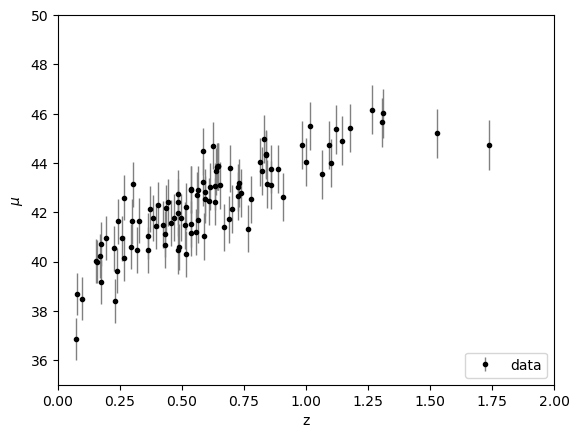

In [46]:
import matplotlib.pyplot as plt
import numpy as np
from astroML.datasets import generate_mu_z

z_sample, mu_sample, dmu = generate_mu_z(100, random_state=1234) # YOU CANNOT CHANGE THIS

plt.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1,label='data')
plt.xlabel("z")
plt.ylabel("$\mu$")
plt.legend(loc='lower right')
plt.xlim(0,2)
plt.ylim(35,50)



I don't know if the follwing is right, or make sense at all

(35.0, 50.0)

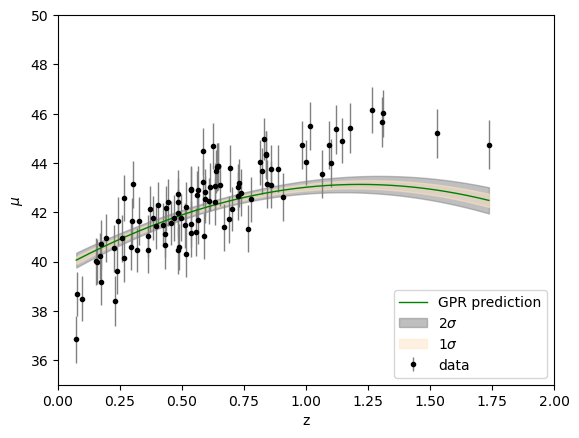

In [53]:
from sklearn.gaussian_process import GaussianProcessRegressor, kernels

z = z_sample[:]
mu = mu_sample[:]
dmu = dmu[:]

indici = np.argsort(z)
z = z[indici]
mu = mu[indici]
dmu = dmu[indici]

l = 3.0
kern = 1.0 * kernels.RBF(l, (l*1e-1, l*1e1))
kern_2 = 1.0 * kernels.Matern()
kern_3 = 1.0 * kernels.RationalQuadratic()
kern_4 = 1.0 * kernels.ExpSineSquared()
kern_5 = 1.0 * kernels.DotProduct()

#capire che valore di alpha
gp = GaussianProcessRegressor(kernel=kern, alpha=dmu**2, optimizer=None)
gp.fit(z[:, np.newaxis], mu)

x = np.linspace(min(z), max(z), 1000)
y_pred, dy_pred = gp.predict(x[:, np.newaxis], return_std=True)


plt.errorbar(z, mu, dmu, fmt='.k', ecolor='gray', lw=1, label='data')

plt.plot(x, y_pred, color='green', lw=1, label='GPR prediction')
plt.fill_between(x, y_pred - 2 * dy_pred, y_pred + 2 * dy_pred, color='gray', alpha=0.5, label='$2\sigma$')
plt.fill_between(x, y_pred - 1 * dy_pred, y_pred + 1 * dy_pred, color='bisque', alpha=0.5, label='$1\sigma$')

plt.xlabel("z")
plt.ylabel("$\mu$")
plt.legend(loc='lower right')
plt.xlim(0,2)
plt.ylim(35,50)


Then, part 2.2